In [39]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import plotly.express as px
import missingno as msno
pd.set_option('display.max_rows', 500)


In [40]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [41]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [42]:
df_country_info = pd.read_csv(url,sep=',')

In [43]:
df_country_info.head(9)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [44]:
df_country_info.to_csv('covid_full_data.csv',':')

In [45]:
df_country_info['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [46]:
b_Ger = df_country_info['location']=='Germany'
b_Aus = df_country_info['location']=='Australia'
b_US = df_country_info['location']=='United States'

In [47]:
sum(b_Ger|b_Aus|b_US)

2661

In [48]:
b_all = b_Ger|b_Aus|b_US

In [49]:
b_all

0         False
1         False
2         False
3         False
4         False
          ...  
197689    False
197690    False
197691    False
197692    False
197693    False
Name: location, Length: 197694, dtype: bool

In [50]:
df_my_list=df_country_info[b_all]

In [51]:
df_my_list

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
10300,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,-47.0,-0.4,2.8,-1.822538
10301,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
10302,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
10303,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
10304,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187148,USA,North America,United States,2022-06-25,86948848.0,39372.0,100488.000,1015933.0,144.0,343.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
187149,USA,North America,United States,2022-06-26,86967399.0,18551.0,101723.857,1015938.0,5.0,343.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
187150,USA,North America,United States,2022-06-27,87092233.0,124834.0,106316.714,1016208.0,270.0,370.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
187151,USA,North America,United States,2022-06-28,87217673.0,125440.0,107941.571,1016757.0,549.0,380.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [52]:
df_my_list = df_my_list.reset_index(drop = True)

In [53]:
df_my_list

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,-47.0,-0.4,2.8,-1.822538
1,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
3,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
4,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,USA,North America,United States,2022-06-25,86948848.0,39372.0,100488.000,1015933.0,144.0,343.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2657,USA,North America,United States,2022-06-26,86967399.0,18551.0,101723.857,1015938.0,5.0,343.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2658,USA,North America,United States,2022-06-27,87092233.0,124834.0,106316.714,1016208.0,270.0,370.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2659,USA,North America,United States,2022-06-28,87217673.0,125440.0,107941.571,1016757.0,549.0,380.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


<AxesSubplot:>

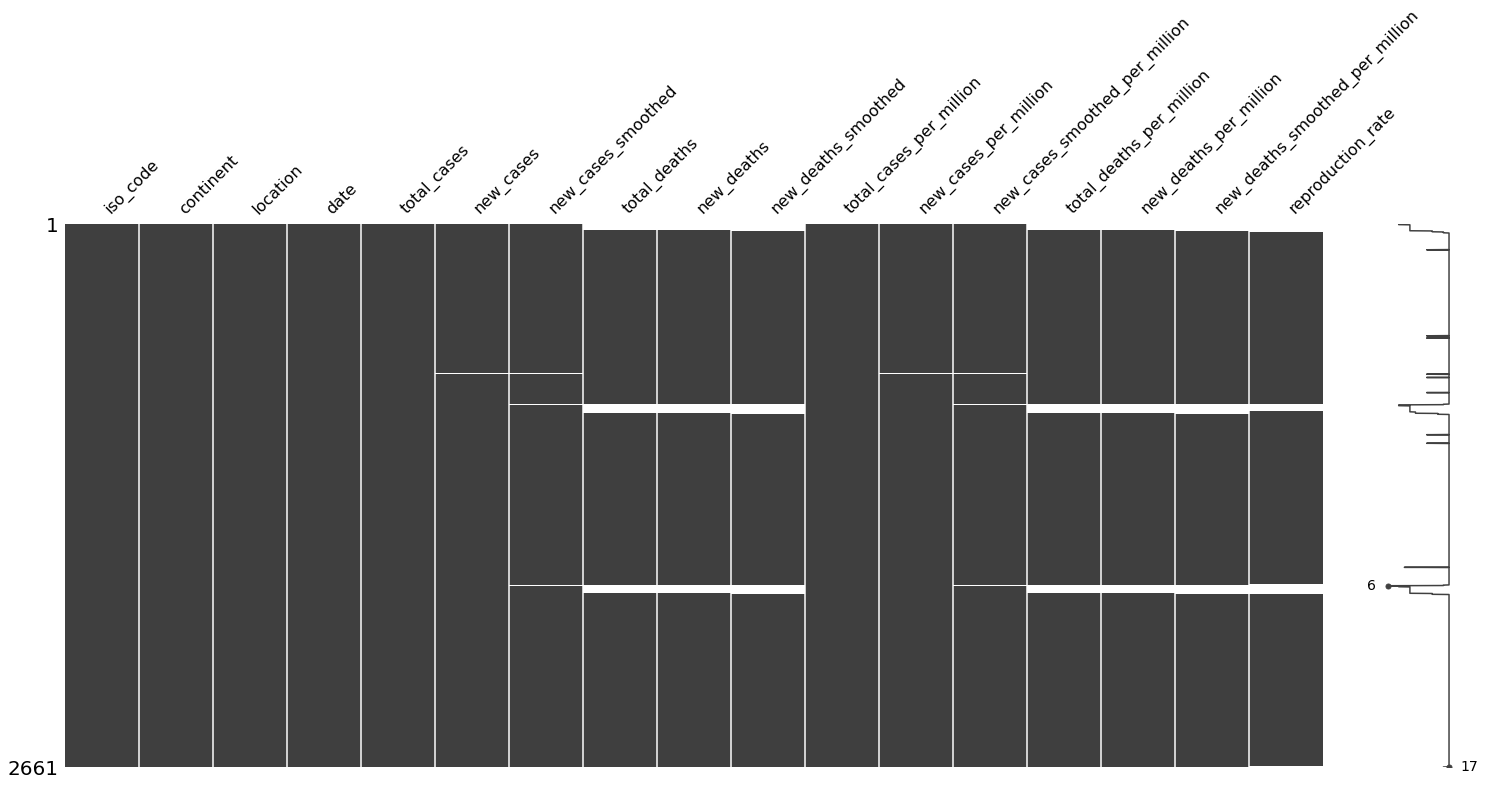

In [54]:
msno.matrix(df_my_list[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate']])

In [55]:
df_my_list['total_cases_norm'] = df_my_list['total_cases']/df_my_list['population']

In [56]:
fig = px.line(df_my_list, x= "date" , y = "total_cases_norm" , color = "location", title = "Muhammad Bilal MNr(422445) Covid Confirmed cases/population")
fig.show()

In [57]:
df_country_info.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [58]:
df_my_list['total_vacinated_norm'] = df_my_list['people_vaccinated']/df_my_list['population']

In [59]:
fig = px.line(df_my_list, x= "date" , y = "total_vacinated_norm" , color = "location", title = "Muhammad Bilal MNr(422445) total vacination/population")
fig.show()